E22001 Aanchal Khanna

## PPP - How much is a customer expected  to claim?
Predicting Expected Insurance Claim  Amount

### I. Business Problem Appreciation

**Why would an insurance company be interested in collecting data about the demographics (age, gender, smoker/non-smoker, blood presssure, BMI, diabetic, children, region) of  its customers and their corresponding claims?**

80% of an insurance company's premium revenue is spent on claims. Therefore, to gain competitive advantage and to minimize future financial losses, it is important for an insurance company to build an accurate model that helps it predict claims with the least amount of error possible. If actual claims differ considerably from expected (predicted claims), an insurance company's capital  and its further underwriting ability will be impacted. Also, predictions of claims support businesses in detecting fraudulent claims. **

Source: https://www.mdpi.com/2227-9091/8/1/22/htm

Consequently, our business problem is modelled as a regression problem where the target variable is "Claim":

**Business (Regression) Problem: Predicting insurance claim amount given certain demographics of customers**

The evaluation criteria for our business problem:
R-square, MSE/RMSE, MAPE 


### II. Data Appreciation and Cleaning

**Relevance, quality, availability of data:**

We have a dataset with features such as age, gender, smoker/non-smoker, blood presssure, BMI, diabetic, children, region. These features, alongwith other predictors such as medical history, etc. (which is not included in this dataset) help in predicting claim amount. Data regarding a few predictors is available, however there are other possible predictors, like medical history, that could play a relevant and important role in determining the claim  amount. 

We conclude that this is a small, reasonable quality  dataset as it only has 1340 rows with few null values in age and region. The source of this dataset is unknown so we cannot be certain of its credibility yet. 

**Data Cleaning**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
ins=pd.read_csv("/Users/aanchalkhanna72/Desktop/Praxis/Term 2/Peer Project/insurance_data.csv")

In [2]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [3]:
ins.isnull().sum()
#There are 5 missing values in age, 3 missing values in region

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

#### Since the dataset is small  and  the number  of missing values is less, we do not want to lose any data. Therefore, we will replace the  missing values with central tendency measures of the respective predictors. 

In [4]:
ins.age.mean()

38.07865168539326

In [5]:
ins.region.mode()

0    southeast
dtype: object

In [6]:
#The average of age is 38.079 and the modal region is southeast. 
#We impute the missing age values with its average.
#and we impute the missing region values with modal region. 

In [7]:
ins.age = ins.age.fillna(ins['age'].mean())

In [8]:
ins.region=ins.region.fillna('southeast')
#ins.region = ins.region.fillna(ins['region'].mode())

In [9]:
#Check if the values have been replaced correctly
ins.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

### III. Univariate Analysis

In [10]:
###Categorical Variables 

In [11]:
ins.region.value_counts()

southeast    446
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

Most patients belong to the southeast region. Patients from  the remaining three regions are evenly distributed in this sample. 

In [12]:
tab=pd.crosstab(ins.diabetic,columns="Counts")
tab/len(ins)*100

col_0,Counts
diabetic,
No,52.089552
Yes,47.910448


Most patients in our dataset are not diabetic. We hypothesize that their claim amount will be lesser than those who have diabetes.  

In [13]:
ins.smoker.value_counts()

No     1066
Yes     274
Name: smoker, dtype: int64

Most patients are not smokers. We hypothesize that their claim amount will be lesser than those who are smokers.

In [14]:
ins.gender.value_counts()

male      678
female    662
Name: gender, dtype: int64

The male:female ratio is close to 1:1. So, we can say that our sample is balanced in terms of gender.

In [15]:
#Numerical 
#Dropping Patient ID as it is not numerical/
ins.drop("PatientID", axis=1,inplace=True)

In [16]:
#describes numerical data
ins.describe()

,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,38.078652,30.668955,94.157463,1.093284,13252.745642
std,11.082175,6.106735,11.434712,1.205334,12109.609288
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,47.000000,34.700000,99.000000,2.000000,16604.305000
max,60.000000,53.100000,140.000000,5.000000,63770.430000


In [17]:
import matplotlib.pyplot as plt

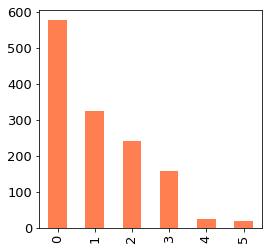

In [18]:
ins['children'].value_counts().plot(kind='bar', figsize=(4,4), color="coral", fontsize=13)
plt.show() #discrete

Most patients have no children. This graph is skewed to the right. Only 25% of the patients have more than 2 kids.

<AxesSubplot:xlabel='age', ylabel='Count'>

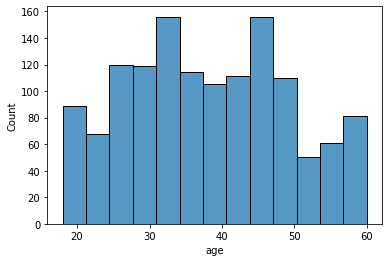

In [19]:
sns.histplot(ins.age)

In [20]:
np.quantile(ins.age,0.85)

50.0

Age is almost uniformly distributed.

25% of the patients are lesser than 29 years of age. 50% of the patients lie within  the 29-47 age range.15% of  the patients are more than 50 years old.   

<AxesSubplot:xlabel='bmi', ylabel='Count'>

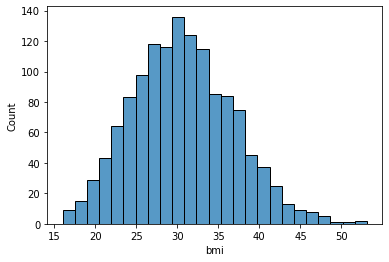

In [21]:
sns.histplot(ins.bmi) #seems normally distributed

<AxesSubplot:xlabel='bmi'>

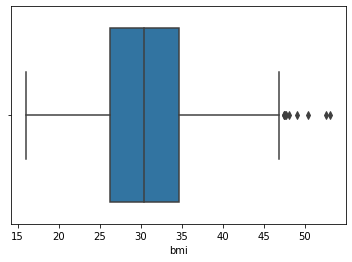

In [22]:
sns.boxplot(ins.bmi) #checking for outliers 

BMI has a close to normal distribution, with a few outliers.

A healthy BMI falls between 18.5-24.9. 25-29.9 falls in the overweight category. If the BMI is above 30, then the patient is obese. Therefore, in our sample, 1-2% of the patients are  underweight, 16% of the patients are considered healthy and 82% of the patients are either overweight/obese according to  the BMI parameter.

In [23]:
np.quantile(ins.bmi,0.02)

19.278000000000002

<AxesSubplot:xlabel='claim'>

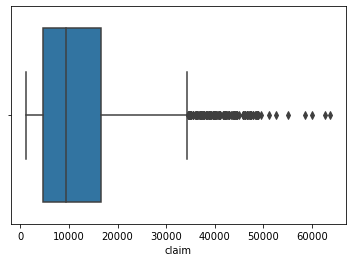

In [24]:
sns.boxplot(ins.claim)

In [25]:
#check percentage
#Since there are many outliers in our  claims column, we carry out a log transformation of claim
logclaim=np.log(ins.claim) #interpretability reduces
ins.insert(9,'logclaim',logclaim,True)
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1340 non-null   object 
 8   claim          1340 non-null   float64
 9   logclaim       1340 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 104.8+ KB


<AxesSubplot:xlabel='logclaim'>

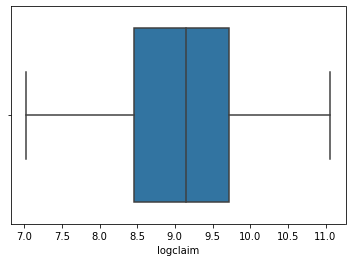

In [26]:
sns.boxplot(ins.logclaim)

The variable 'Claim' is skewed to the right. There are many outliers in this variable. There could be many reasons for these outliers:
1. These outliers could be patients could be smokers and diabetic and with  high BMI and blood pressure (thereby needing more medical care, and therefore higher medical insurance and claim amount). 
2. These claims could even be fraudulent. 

Outliers pull up or pull  down the mean drastically  as they are extreme values. We will therefore transform this variable by doing log transformation so that it doesn't affect our regression line  during modelling. It will also prevent us from losing these data points. 

<AxesSubplot:xlabel='bloodpressure'>

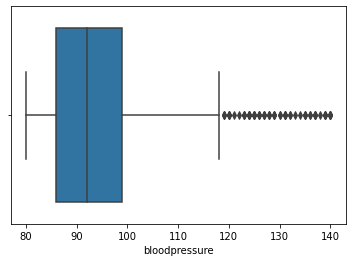

In [27]:
sns.boxplot(ins.bloodpressure)

In [28]:
 np.quantile(ins.bloodpressure,0.90)

108.0

50% of the patients in our sample have blood pressure between 80-92mmHg. The remaining 50% have a high amount of variability.
90% of the patients in our sample have blood pressure below 108mmHg, which shows that they are healthier.

#### QUESTIONS AFTER UNIVARIATE ANALYSIS:
1) Do diabetics have a higher claim amount than non-diabetics?

2) Do smokers have a higher claim amount than non-smokers?

3) Which region has the lowest/highest claim amount?

4) Do males claim a higher amount than females?

5) How does blood pressure affect the claim amount?

6) Do older people have higher claim amounts? 

7) Considering most patients have a high BMI, do they receive a higher claim amount?

8) Which variables are highly correlated with each other?


### IV. Bivariate Analysis (BA)

#### Feature to Target BA

In [29]:
#Hypothesis testing of claims after observing patterns/visual relationships within data 
#Why do we do univariate/bivariate analysis - to test claims, to speak more formally about  data rather than intuitively, to know if we are training our data in the most  unbiased way possible
#implication of each analysis
#feature engineering is what will give our analyses an edge
#correlation hypothesis testing

<AxesSubplot:>

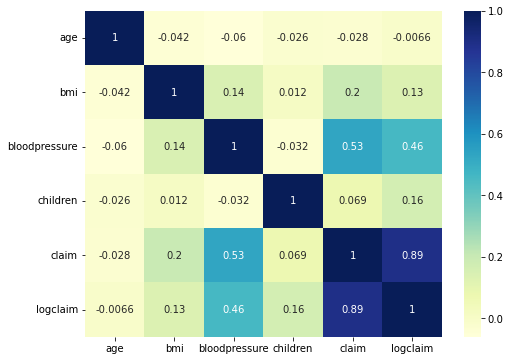

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(ins.corr(),annot=True,cmap="YlGnBu")

> 1) Do diabetics have a higher claim amount than non-diabetics?


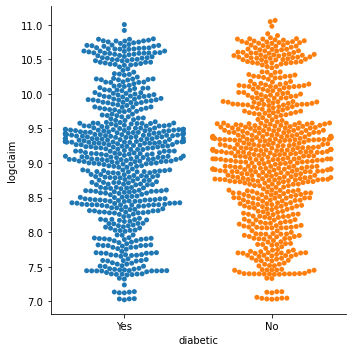

In [31]:
sns.catplot(x="diabetic", y="logclaim", data=ins, kind="swarm")

Text(0.5, 1.0, 'Boxplot of Claims')

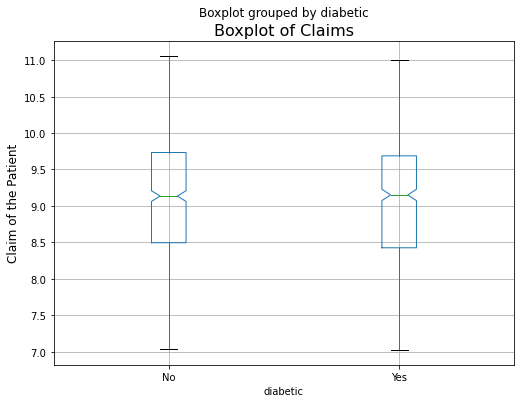

In [32]:
#Side by Side boxplot 
ins.boxplot(column="logclaim",grid=True, notch=True,
             by="diabetic", #do not include grid
         figsize=(8,6)) #length, height of the plot 

plt.ylabel("Claim of the Patient", fontsize=12)
plt.title("Boxplot of Claims", fontsize=16)


In [33]:
ins.groupby("diabetic")["claim"].mean()

diabetic
No     13354.031991
Yes    13142.624346
Name: claim, dtype: float64

Being diabetic does not seem to impact the claim amount. The mean claim amount as well  as  the amount claimed at each quartile is similar.

> 2) Do smokers have a higher claim amount than non-smokers?

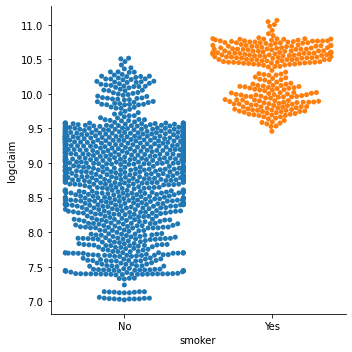

In [34]:
sns.catplot(x="smoker", y="logclaim", data=ins, kind="swarm", hue="smoker")

Text(0.5, 1.0, 'Boxplot of Claims')

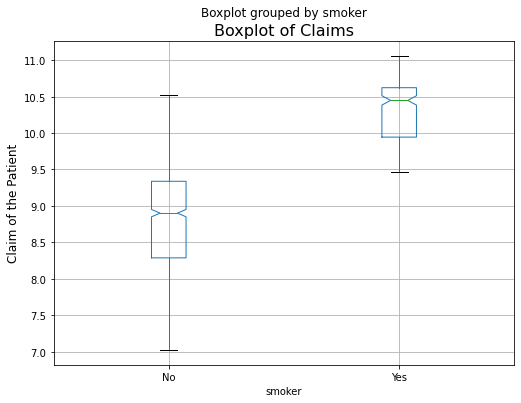

In [35]:
#Side by Side boxplot 
ins.boxplot(column="logclaim",grid=True, notch=True,
             by="smoker", #do not include grid
         figsize=(8,6)) #length, height of the plot 

plt.ylabel("Claim of the Patient", fontsize=12)
plt.title("Boxplot of Claims", fontsize=16)

In [36]:
np.exp(10.5),np.exp(8.9)

(36315.502674246636, 7331.973539155995)

It is clear from our graphs that smokers have a higher claim amount than non-smokers. For instance, the median claim of a smoker is np.exp(10.5)=36315 units whereas the median claim of a non-smoker is np.exp(8.9)=7332 units. We will carry out a hypothesis test to check if the  difference in sample means are statistically significant.

In [37]:
#sample of non  smokers
ns_c = ins.loc[ins["smoker"]=='No']
#sample of smokers
s_c = ins.loc[ins["smoker"]=='Yes']

In [38]:
ins.groupby("smoker")["logclaim"].mean()

smoker
No      8.785335
Yes    10.304110
Name: logclaim, dtype: float64

In [39]:
ins.groupby("smoker")["logclaim"].count()

smoker
No     1066
Yes     274
Name: logclaim, dtype: int64

In [40]:
ins.groupby(ins.smoker)["logclaim"].var()

smoker
No     0.557399
Yes    0.150173
Name: logclaim, dtype: float64

We are testing the hypothesis that smokers claim higher amount than non-smokers, i.e, the population mean claim amount for smokers is  higher than population mean claim amount for non-smokers.

In [41]:
#Ho: mu_claim(smokers)-mu_claim(non-smokers) <= 0
#H1: mu_claim(smokers)-mu_claim(non-smokers) > 0 i.e. avg claim amount of smokers is higher than avg claim amt of non-smokers

In [42]:
#z-critical value for a  right tailed test
from scipy import stats
t_crit=stats.t.isf(0.05,df=1340-2) 
t_crit

1.6459932615808077

In [43]:
#t-statistic
t_stat=(10.30-8.78)-(0)/np.sqrt((0.15/274)+(0.56/1066))
t_stat

1.5200000000000014

In [44]:
#pvalue
stats.norm.sf(t_stat)

0.06425548781893566

We cannot reject the null hypothesis. Therefore, the difference between the claims of smokers and non-smokers is not statistically significant than zero. There is insufficient  evidence that smokers claim  higher amounts than non-smokers.

> 3) Which region has the lowest/highest claim amount?

Text(0.5, 1.0, 'Boxplot of Claims')

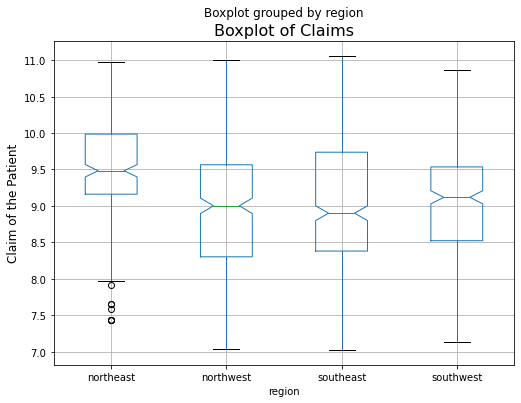

In [45]:
#Side by Side boxplot 
ins.boxplot(column="logclaim",grid=True, notch=True,
             by="region", #do not include grid
         figsize=(8,6)) #length, height of the plot 

plt.ylabel("Claim of the Patient", fontsize=12)
plt.title("Boxplot of Claims", fontsize=16)

In [46]:
ins.groupby("region")['claim'].mean()

region
northeast    16889.044719
northwest    11672.088453
southeast    12979.121502
southwest    12723.129841
Name: claim, dtype: float64

In [47]:
#Q3 cutoff  for each region
np.exp(10),np.exp(9.6),np.exp(9.75),np.exp(9.5)

(22026.465794806718,
 14764.781565577267,
 17154.228809290984,
 13359.726829661873)

As is visible in our graphs and mean calculations, the northeast region has the highest average claim amount associated with it whereas the northwest region has the lowest average claim amount. Moreover, 75% of the patients claim less than (approx) 22k (units) in NE, less than 15k units in NW, less than 17k units in SE and less than 13k in SW. There is considerable difference in the claim amounts of NE and the rest of the country. We will  test this hypothesis in the end.

In [48]:
#One-way ANOVA testing

#Ho: mu_claims(northeast)=mu_claims(northwest)=mu_claims(southeast)=mu_claims(southwest)
#H1: Not all means are equal

In [49]:
northeast= ins.loc[ins["region"]=='northeast']
northwest= ins.loc[ins["region"]=='northwest'] 
southeast= ins.loc[ins["region"]=='southeast'] 
southwest= ins.loc[ins["region"]=='southwest'] 
ne_c=northeast.logclaim
nw_c=northwest.logclaim
se_c=southeast.logclaim
sw_c=southwest.logclaim

In [50]:
#normality test
#Ho: All three populations  are normally distributed
#H1: All three populations are not normally distributions 
stats.shapiro(ne_c),stats.shapiro(nw_c),stats.shapiro(se_c),stats.shapiro(sw_c)

(ShapiroResult(statistic=0.9480639696121216, pvalue=2.3670136783948692e-07),
 ShapiroResult(statistic=0.9821915030479431, pvalue=0.0002596008707769215),
 ShapiroResult(statistic=0.9734567403793335, pvalue=3.0243609216995537e-07),
 ShapiroResult(statistic=0.9808722734451294, pvalue=0.0003366812888998538))

According to the Shapiro test, we fail to reject the null hypothesis. Therefore, we can consider that our populations are normally distributed.

In [51]:
#variance equality test
#Ho: All three populations have equal variances
#H1: All three populations do not have equal variances
stats.levene(ne_c,nw_c,se_c,sw_c)

LeveneResult(statistic=10.807227144488024, pvalue=5.116709133884817e-07)

The variance equality test shows that the null hypothesis is rejected. Therefore, our assumption of equal  variances for carrying out ANOVA Testing  is violated. If we continue to carry out this test, our results may not be reliable.

In [52]:
#Ho: Mean claim amounts of all regions are equal
#H1: Not all mean claim amounts of all regions are equal

In [53]:
#one way ANOVA test results
f_test,p_val=stats.f_oneway(ne_c,nw_c,se_c,sw_c)
print(f_test)
print(p_val)

18.975662909598483
4.707418071697627e-12


According to our test results, we can reject the null hypothesis on the basis of our p-value. Since p-value is lower than 0.05, we can confirm our hypothesis that the mean claim amounts of all regions are not equal. 

> 4) Do males claim a higher amount than females?


In [54]:
ins.groupby("gender")['claim'].mean()

gender
female    12569.578897
male      13919.790457
Name: claim, dtype: float64

In [55]:
ins.groupby("gender")['claim'].quantile(0.72)

gender
female    13844.7768
male      16365.1876
Name: claim, dtype: float64

Text(0.5, 1.0, 'Boxplot of Claims')

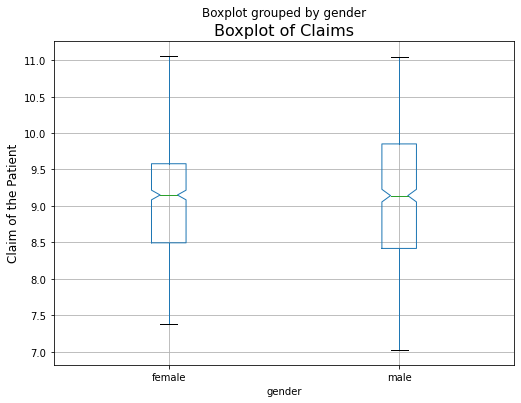

In [56]:
#Side by Side boxplot 
ins.boxplot(column="logclaim",grid=True, notch=True,
             by="gender", #do not include grid
         figsize=(8,6)) #length, height of the plot 

plt.ylabel("Claim of the Patient", fontsize=12)
plt.title("Boxplot of Claims", fontsize=16)

On an average, claim amount seems independent of gender, however, beyond a certain threshold (3rd quartile), males seem to claim higher amounts than females. So,according to our boxplot, 28% of the males claim a higher amount than females. 

> 5) How does having abnormal blood pressure affect the claim amount?

<AxesSubplot:xlabel='bloodpressure', ylabel='claim'>

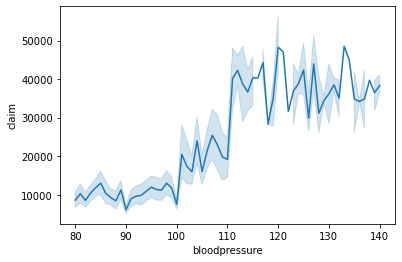

In [57]:
#lineplot 
sns.lineplot(x="bloodpressure",y="claim",data=ins)

<AxesSubplot:xlabel='bloodpressure', ylabel='claim'>

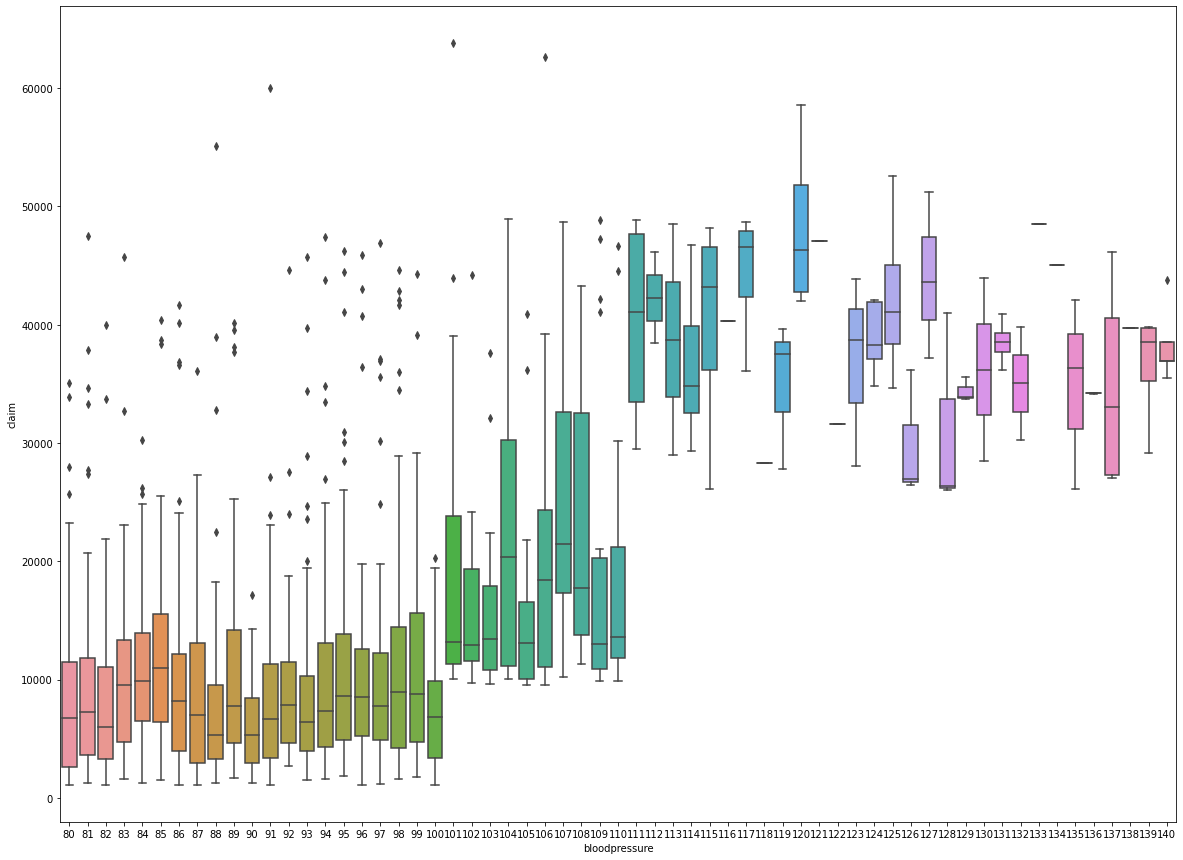

In [58]:
plt.figure(figsize = (20,15))
sns.boxplot(x="bloodpressure",y="claim",data=ins)

We presume that BP is reported as systolic readings. According to our graph, as blood pressure increases beyond an acceptable level of 120 mm Hg (millimeters of mercury) to 140 mm Hg, the  claim amount also increases. Systolic pressure below 90 is also dangerous, however the data shows that claim amount is not high inn this category. The correlation coefficient between price and bloodpressure is 0.56. We would like  to test the hypothesis that there is a strong correlation between blood pressure and claim in the population. We could bin the people with higher blood pressure and compare means. 

**Feature transformation: Visually, there seem to be two classes of claims associated with normal and  abnormal blood pressure. We could bin individuals into normal, abnormal blood pressure and use blood pressure as a categorical variable.** 

# Get confirmation

> 6) Do older people have higher claim amounts?


<AxesSubplot:xlabel='age', ylabel='logclaim'>

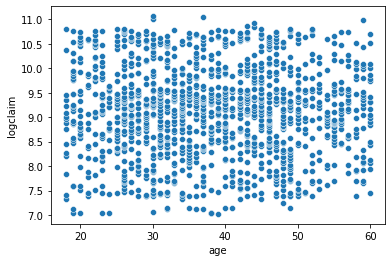

In [59]:
#do not use lineplot  as it is used for trends
#scatterplot
sns.scatterplot(x="age",y="logclaim",data=ins)

Surprisingly, age does not seem to have a positive or negative relationship with claim. 

> 7) Considering most patients have a high BMI, do they receive a higher claim amount?

<AxesSubplot:xlabel='bmi', ylabel='claim'>

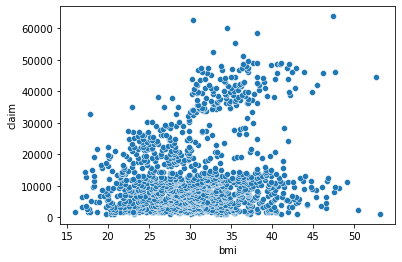

In [60]:
#scatterplot
sns.scatterplot(x="bmi",y="claim",data=ins)

As BMI increases, we see more variability in claim amounts. This means that if we were to create a regression line through this graph, the errors at the latter end  would be more. One way to deal with this problem is to create a log transformation of this feature. 

**Feature Transformation: Log transformation of BMI, Binning BMI into 2-3 categories and predicting claim amount in model** 

In [61]:
#A healthy BMI falls between 18.5-24.9. 25-29.9 falls in the overweight category. BMI>30 falls in obese category.
#We chose the threshold of BMI as  25 because beyond 25, a person is considered overweight.We included underweight individuals
#in low category because their claims are also low for the most part. 
bmi_high=ins.loc[ins.bmi>25,["bmi","logclaim"]]
bmi_not_high=ins.loc[ins.bmi<=25,["bmi","logclaim"]] #not low because normal also included

In [62]:
print("Avg claim of high_bmi category is ",bmi_high["logclaim"].mean())

Avg claim of high_bmi category is  9.135910090358843


In [63]:
bmi_not_high=ins.loc[ins.bmi<=25,["bmi","logclaim"]]
bmi_not_high

,bmi,logclaim
0,23.2,7.022752
10,19.8,7.124132
11,20.3,7.124688
12,20.7,7.125138
20,23.2,7.323395
...,...,...
1157,24.9,10.207953
1161,22.4,10.217418
1179,24.7,10.314491
1187,17.8,10.396175


In [64]:
print("Avg claim of low_bmi category is ",bmi_not_high["logclaim"].mean())

Avg claim of low_bmi category is  8.919676045612727


In [65]:
len(bmi_high),len(bmi_not_high)

(1092, 248)

In [66]:
bmi_high["logclaim"].var(),bmi_not_high["logclaim"].var()

(0.8687018127756077, 0.7296234289621701)

In [67]:
#Ho: mu_claim(high bmi)-mu_claim(not_high_bmi)<=0
#H1: mu_claim(high bmi)-mu_claim(not_high_bmi)>0

In [68]:
#t_critical value
t_crit=stats.t.isf(0.05,df=1340-2)
t_crit

1.6459932615808077

In [69]:
#t_statistic
t_stat=(9.14-8.92)-(0)/np.sqrt((0.87/1092)+(0.73/248))
t_stat

0.22000000000000064

In [70]:
#pvalue
pval=stats.t.sf(0.22,df=1340-2)
pval

0.41295235734033864

We cannot reject the null hypothesis that the difference in claims of people  with high BMI vs those with normal&low BMI is statistically signifcant from zero. Therefore, our  hypothesis is proven unlikely.

### V. Feature to feature Bivariate Analysis + Feature Transformation

> Which variables are highly correlated among gender,smoker,diabetic,bmi,bloodpresure?

In [72]:
#VIF - Variable Inflation Factor Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating dummies
ins['gender_d'] = ins['gender'].map({'male':0, 'female':1})
ins['smoker_d'] = ins['smoker'].map({'No':0, 'Yes':1})
ins['diabetic_d']=ins['diabetic'].map({'No':0, 'Yes':1})

#VIF
X = ins[['gender_d', 'smoker_d', 'diabetic_d','bloodpressure','bmi']]

#creating VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

         feature        VIF
0       gender_d   1.973049
1       smoker_d   1.401597
2     diabetic_d   1.892472
3  bloodpressure  26.285603
4            bmi  22.974643


**Making sense of VIF**

gender_d r_squared=0.49
1=1.97-1.97(R_SQ)
1.97(r_sq)=0.97 

smoker_d r_Squared=0.29

diabetic_d r_squared=0.47

bloodpressure r_Squared=0.96

bmi r_squared=0.96

**Blood pressure  and bmi seem to be highly  correlated considering if the features are regressed on other  features in  this VIF model, the R squared of bloodpressure and bmi are very high.**

>  Is the sample evenly distributed according to gender, region?

In [73]:
pd.crosstab(ins.region,ins.gender)

gender,female,male
region,,
northeast,112,119
northwest,164,185
southeast,224,222
southwest,162,152


> What is the distribution of the claim amounts of male,female smokers according to region?

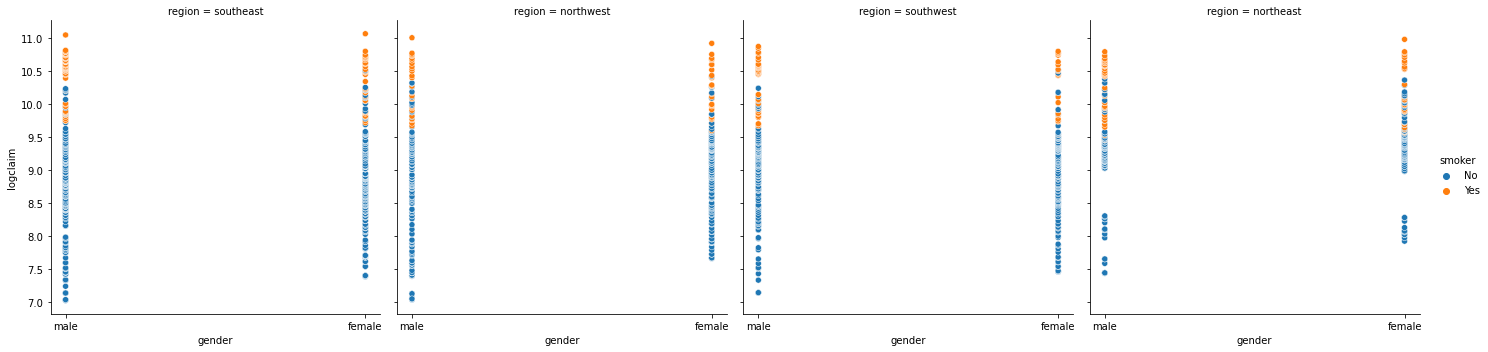

In [74]:
sns.relplot(
    data=ins, x="gender", y="logclaim",
    col="region", hue="smoker",
    kind="scatter"
)

**Female, male smokers across regions seem to claim higher amounts, however, in northeast region, claims of both women and men seem to be higher (with a smaller range).**

> What is the distribution of the claim amounts of smokers according to bmi,region?

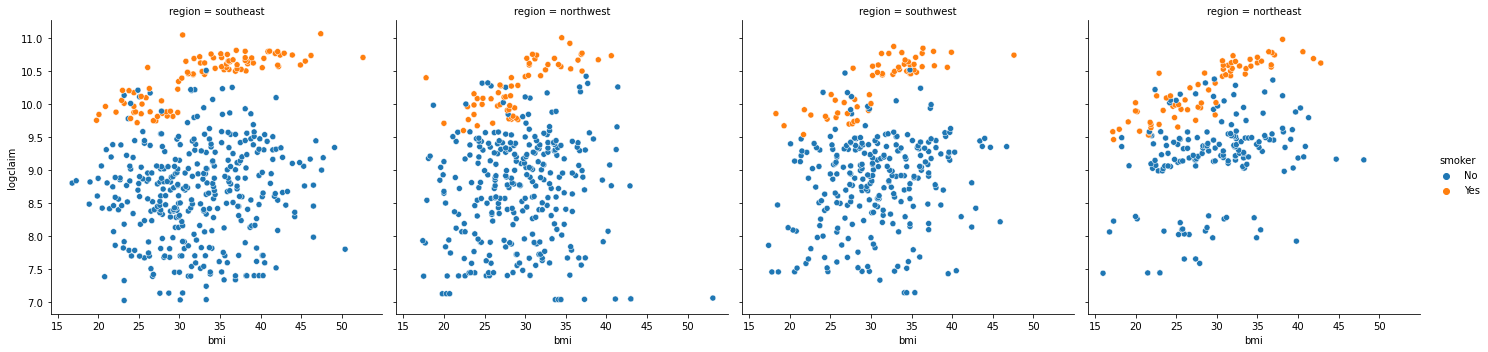

In [75]:
sns.relplot(
    data=ins, x="bmi", y="logclaim",
    col="region", hue="smoker",
    kind="scatter"
)

**This visual also tells  a similar story. Smokers with higher bmi are claiming higher amounts in all regions. There are more smokers with high BMI in southeast region.**

### Feature Transformations

> **Feature Transformations to be considered for running the basic model**:
    
a. age (as it is)

b. gender (changed to dummy "gender_d" with female=1,male=0)

c. diabetic (changed to dummy "diabetic_d" with diabetic=1,non-diabetic=0)

d. children (as it is)

e. region (one hot encoding to 4 variables or bin northeast against all  others?)

f. smoker (2 categories - smoker=1, nonsmoker=0)

g. claim (log claim)


**(b),(c),(f) done during VIF in the previous section**

In [76]:
#one-hot encoding for region
regions=pd.get_dummies(ins, columns=['region'])
ins = pd.concat([regions], axis='columns')
ins

,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,logclaim,gender_d,smoker_d,diabetic_d,region_northeast,region_northwest,region_southeast,region_southwest
0,39.000000,male,23.2,91,Yes,0,No,1121.87,7.022752,0,0,1,0,0,1,0
1,24.000000,male,30.1,87,No,0,No,1131.51,7.031308,0,0,0,0,0,1,0
2,38.078652,male,33.3,82,Yes,0,No,1135.94,7.035216,0,0,1,0,0,1,0
3,38.078652,male,33.7,80,No,0,No,1136.40,7.035621,0,0,0,0,1,0,0
4,38.078652,male,34.1,100,No,0,No,1137.01,7.036157,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5,88,Yes,0,Yes,55135.40,10.917547,1,1,1,0,1,0,0
1336,59.000000,female,38.1,120,No,1,Yes,58571.07,10.977996,1,1,0,1,0,0,0
1337,30.000000,male,34.5,91,Yes,3,Yes,60021.40,11.002456,0,1,1,0,1,0,0
1338,37.000000,male,30.4,106,No,0,Yes,62592.87,11.044407,0,1,0,0,0,1,0


In [77]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1340 non-null   float64
 1   gender            1340 non-null   object 
 2   bmi               1340 non-null   float64
 3   bloodpressure     1340 non-null   int64  
 4   diabetic          1340 non-null   object 
 5   children          1340 non-null   int64  
 6   smoker            1340 non-null   object 
 7   claim             1340 non-null   float64
 8   logclaim          1340 non-null   float64
 9   gender_d          1340 non-null   int64  
 10  smoker_d          1340 non-null   int64  
 11  diabetic_d        1340 non-null   int64  
 12  region_northeast  1340 non-null   uint8  
 13  region_northwest  1340 non-null   uint8  
 14  region_southeast  1340 non-null   uint8  
 15  region_southwest  1340 non-null   uint8  
dtypes: float64(4), int64(5), object(3), uint8(

> **Feature Transformations to be considered after running the basic model**:

a. bmi (2 categories - low, high for health score)

b. bloodpressure (3 categories - low, normal, high; low+high=1, normal=0 for health score

c. diabeticxsmoker

d. health_score = diabetic_d+smoker_d+bloodpressue_d+bmi_d

e. northeast vs other regions concatenated columns

separating dataset for smokers vs non smokers and running  separate models on the same

**Interaction  variables: DiabeticXbloodpressure,smokerXBMI, DiabetesXBloodpressureXSmoker**
use interaction variables only when:

#backed by research
#look for interaction plot (atleast one categorical out of two,both numeric rare)
#square when you see non-linear relationship

<AxesSubplot:xlabel='region_others', ylabel='Count'>

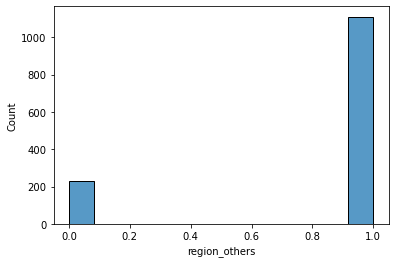

In [78]:
#add region columns - northeast vs others
ins["region_others"]=ins.region_northwest+ins.region_southeast+ins.region_southwest
sns.histplot(ins.region_others)

In [79]:
#creating categories for bp - abnormal/normal
#creating categories for bmi - healthy/unhealthy

In [80]:
#creating health score column
ins["health_score"]=ins.diabetic_d+ins.smoker_d

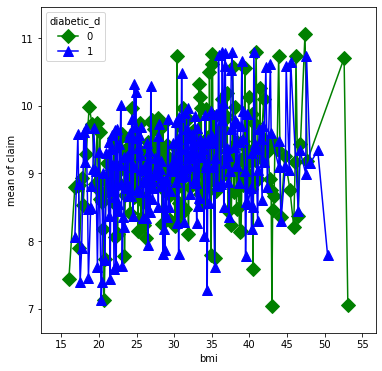

In [81]:
# interaction between diabetic_d and region
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=ins.bmi,
    trace=ins.diabetic_d,
    response=logclaim,
    colors=["green", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

In [82]:
#creating interaction term
ins["diabeticxbmi"]=ins.diabetic_d*ins.bmi

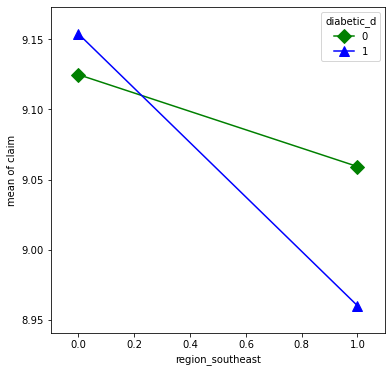

In [83]:
# interaction between diabetic_d and southeast region
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=ins.region_southeast,
    trace=ins.diabetic_d,
    response=logclaim,
    colors=["green", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

In [84]:
#creating interaction term
ins["diabeticxse"]=ins.diabetic_d*(ins.region_southeast)
ins.diabeticxse

0       1
1       0
2       1
3       0
4       0
       ..
1335    0
1336    0
1337    0
1338    0
1339    0
Name: diabeticxse, Length: 1340, dtype: int64

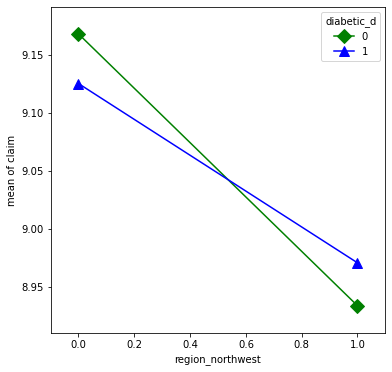

In [85]:
#interaction between northwest and diabetic
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=ins.region_northwest,
    trace=ins.diabetic_d,
    response=logclaim,
    colors=["green", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

In [86]:
ins["diabeticxnw"]=ins.diabetic_d*(ins.region_northwest)
ins.diabeticxnw

0       0
1       0
2       0
3       0
4       0
       ..
1335    1
1336    0
1337    1
1338    0
1339    0
Name: diabeticxnw, Length: 1340, dtype: int64

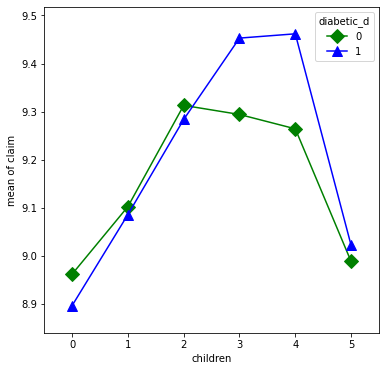

In [87]:
# interaction between children and southeast region
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=ins.children,
    trace=ins.diabetic_d,
    response=logclaim,
    colors=["green", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

In [88]:
ins["diabeticxchildren"]=ins.diabetic_d*(ins.children)
ins.diabeticxchildren

0       0
1       0
2       0
3       0
4       0
       ..
1335    0
1336    0
1337    3
1338    0
1339    0
Name: diabeticxchildren, Length: 1340, dtype: int64

In [89]:
ins["smokerxdiabetic"]=ins.smoker_d*(ins.diabetic_d)
ins.smokerxdiabetic

0       0
1       0
2       0
3       0
4       0
       ..
1335    1
1336    0
1337    1
1338    0
1339    0
Name: smokerxdiabetic, Length: 1340, dtype: int64

In [90]:
#relation between children, bloodpressure, claim

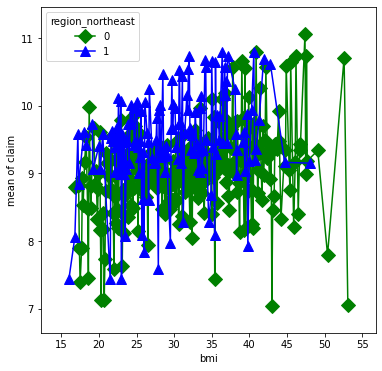

In [91]:
# interaction between children and southeast region
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=ins.bmi,
    trace=ins.region_northeast, #valid across all regions
    response=logclaim,
    colors=["green", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

In [92]:
ins["bmixne"]=ins.bmi*(ins.region_northeast)
ins.bmixne

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1335     0.0
1336    38.1
1337     0.0
1338     0.0
1339     0.0
Name: bmixne, Length: 1340, dtype: float64

In [93]:
#correlation between categorical variable and numerical variable - point biserial coefficient, 
#multicollinearity (linear relation) between variables - vif 
#re-scale values if there are high ranges of vars
#re-scale values if vars are in all diffferent units of measurement
#interpretability of claims  when log transformed?
#plotting log(claim) against claims
#training adj r-squared and test adj r-squared should be near each other; improve training performance and reduce error in test performance
#try 1/variable transformation ( 1 by )
#interaction variable: gender, BMI 
#keep my variable  as  a  numerical, categorical variable?
# bivariate analysis - comparison of means,  correlation (numeric), proportions\\\ we do so as to do feature selection, engineering, explaining model to customers  (As to why certain x were chosen)


### VI. Model Fitting

In [94]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1340 non-null   float64
 1   gender             1340 non-null   object 
 2   bmi                1340 non-null   float64
 3   bloodpressure      1340 non-null   int64  
 4   diabetic           1340 non-null   object 
 5   children           1340 non-null   int64  
 6   smoker             1340 non-null   object 
 7   claim              1340 non-null   float64
 8   logclaim           1340 non-null   float64
 9   gender_d           1340 non-null   int64  
 10  smoker_d           1340 non-null   int64  
 11  diabetic_d         1340 non-null   int64  
 12  region_northeast   1340 non-null   uint8  
 13  region_northwest   1340 non-null   uint8  
 14  region_southeast   1340 non-null   uint8  
 15  region_southwest   1340 non-null   uint8  
 16  region_others      1340 

#### FORWARD SELECTION: We will add features one by one to observe its imapct on adjusted R-squared of the test model.

#### Model 1: Trained on "Age" Feature only

In [95]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# defining features and target
y = ins.logclaim
X = ins[["age"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model1 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [96]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model1.predict(X_train)
train_rmse_model1=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model1.predict(X_test)
test_rmse_model1=np.sqrt(np.mean((y_test-y_test_pred)**2))

print("RMSE Training error of Model 1: ",train_rmse_model1,"\nRMSE Test error of Model 1: ",test_rmse_model1,"\nAdjusted R-squared: ",model1.rsquared_adj)

RMSE Training error of Model 1:  0.9223267553597072 
RMSE Test error of Model 1:  0.9198488827672461 
Adjusted R-squared:  -0.0006099866296385148


#### Model 2: Trained on "Age" and "Gender" Feature only

In [97]:
# defining features and target
y = ins.logclaim
X = ins[["age","gender_d"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)

model2 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [98]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model2.predict(X_train)
train_rmse_model2=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model2.predict(X_test)
test_rmse_model2=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 2: ",train_rmse_model2,"\nTest error of Model 2: ",test_rmse_model2,"\nAdjusted R-squared: ",model2.rsquared_adj)

Training error of Model 2:  0.9220616813310448 
Test error of Model 2:  0.921675750801756 
Adjusted R-squared:  -0.0010329633203063349


#### Model 3: Trained on "Age", "Gender","Children" Feature only

In [138]:
# defining features and target
y = ins.logclaim
X = ins[["age","gender_d","children"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)

model3 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [139]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model3.predict(X_train)
train_rmse_model3=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model3.predict(X_test)
test_rmse_model3=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 3: ",train_rmse_model3,"\nTest error of Model 3: ",test_rmse_model3,"\nAdjusted R-squared: ",model3.rsquared_adj)

Training error of Model 3:  0.9123095024751202 
Test error of Model 3:  0.9017863937159166 
Adjusted R-squared:  0.019050903937065322


#### Model 4: Trained on "Age", "Gender","Children","BMI" Feature only

In [140]:
# defining features and target
y = ins.logclaim
X = ins[["age","gender_d","children","bmi"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model4 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [141]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model4.predict(X_train)
train_rmse_model4=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model4.predict(X_test)
test_rmse_model4=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 4: ",train_rmse_model4,"\nTest error of Model 4: ",test_rmse_model4,"\nAdjusted R-squared: ",model4.rsquared_adj)

Training error of Model 4:  0.9023846051159125 
Test error of Model 4:  0.9012854444578283 
Adjusted R-squared:  0.03931832410304292


#### Model 5: Trained on "Age", "Gender","Children","BMI","Bloodpressure" Features only

In [142]:
# defining features and target
y = ins.logclaim
X = ins[["age","gender_d","children","bmi","bloodpressure"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model5 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [143]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model5.predict(X_train)
train_rmse_model5=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model5.predict(X_test)
test_rmse_model5=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 5: ",train_rmse_model5,"\nTest error of Model 5: ",test_rmse_model5,"\nAdjusted R-squared: ",model5.rsquared_adj)

Training error of Model 5:  0.7973691076726013 
Test error of Model 5:  0.8070846358210443 
Adjusted R-squared:  0.24915641360653917


#### Model 6: Trained on "Age", "Gender","Children","BMI","Bloodpressure","Diabetic" Features only

In [146]:
# defining features and target
y = ins.logclaim
X = ins[["age","gender_d","children","bmi","bloodpressure","diabetic_d"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model6 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [147]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model6.predict(X_train)
train_rmse_model6=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model6.predict(X_test)
test_rmse_model6=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 6: ",train_rmse_model6,"\nTest error of Model 6: ",test_rmse_model6,"\nAdjusted R-squared: ",model6.rsquared_adj)

Training error of Model 6:  0.7973691072046775 
Test error of Model 6:  0.8070849554441399 
Adjusted R-squared:  0.24840406620570532


#### Model 7: Trained on "Age", "Gender","Children","BMI","Bloodpressure","Diabetic","Smoker" Features only

In [148]:
# defining features and target
y = ins.logclaim
X = ins[["age","gender_d","children","bloodpressure","diabetic_d","smoker_d","bmi"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model7 = sm.OLS(y_train,X_train).fit()  #Y comes first


In [149]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model7.predict(X_train)
train_rmse_model7=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model7.predict(X_test)
test_rmse_model7=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 7: ",train_rmse_model7,"\nTest error of Model 7: ",test_rmse_model7,"\nAdjusted R-squared: ",model7.rsquared_adj)

Training error of Model 7:  0.6260363026446121 
Test error of Model 7:  0.6715414250581644 
Adjusted R-squared:  0.536232800570376


#### Model 8: Trained on "Age", "Gender","Children","BMI","Bloodpressure","Diabetic","Smoker","Region_Northeast" Features only

In [267]:
# defining features and target
y = ins.logclaim
X = ins[["age","gender_d","children","bmi","bloodpressure","diabetic_d","smoker_d","region_northeast","region_others"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model8 = sm.OLS(y_train,X_train).fit()  #Y comes first
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logclaim   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          8.45e-175
Time:                        01:05:49   Log-Likelihood:                -925.24
No. Observations:                1005   AIC:                             1868.
Df Residuals:                     996   BIC:                             1913.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.4767      0.137     32.743      0.000       4.208       4.745
age                  0.0014      0.002      0.768      0.443      -0.002       0.005
gender_d             0.0654      0.042      1.558      0.120      -0.017       0.148
children             0.1294      0.016      8.010      0.000       0.098       0.161
bmi                  0.0164      0.003      5.064      0.000       0.010       0.023
bloodpressure        0.0164      0.002      8.810      0.000       0.013       0.020
diabetic_d          -0.0326      0.039     -0.844      0.399      -0.108       0.043
smoker_d             1.3010      0.052     24.871      0.000       1.198       1.404
region_northeast     2.4390      0.075     32.542      0.000       2.292       2.586
region_others        2.0377      0.071     28.706      0.000       1.898       2.177
==============================================================================
Omnibus:                        6.149   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.197
Skew:                          -0.192   Prob(JB):                       0.0451
Kurtosis:                       2.970   Cond. No.                     2.35e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [151]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model8.predict(X_train)
train_rmse_model8=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model8.predict(X_test)
test_rmse_model8=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 8: ",train_rmse_model8,"\nTest error of Model 8: ",test_rmse_model8,"\nAdjusted R-squared: ",model8.rsquared_adj)

Training error of Model 8:  0.6075614720030892 
Test error of Model 8:  0.6720050971941535 
Adjusted R-squared:  0.5627626385899152


### Howevever, interestingly, removing  the log of target variable results in a remarkably higher adjusted R-squared ..

In [275]:
### Using "claim" as target in Model 8 to check increase in adjusted R-squared
# defining features and target
y = ins.claim
X = ins[["age","gender_d","children","bmi","bloodpressure","diabetic_d","smoker_d","region_northeast","region_southeast"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model8 = sm.OLS(y_train,X_train).fit()  #Y comes first
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     295.5
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          6.81e-274
Time:                        01:12:07   Log-Likelihood:                -10248.
No. Observations:                1005   AIC:                         2.052e+04
Df Residuals:                     995   BIC:                         2.056e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.486e+04   2185.666    -11.376      0.000   -2.92e+04   -2.06e+04
age                 15.9903     20.132      0.794      0.427     -23.515      55.496
gender_d           123.0533    448.451      0.274      0.784    -756.965    1003.071
children           727.9262    172.549      4.219      0.000     389.325    1066.527
bmi                354.5229     35.131     10.092      0.000     285.584     423.462
bloodpressure      231.3290     19.839     11.661      0.000     192.399     270.259
diabetic_d        -514.3964    413.245     -1.245      0.214   -1325.328     296.535
smoker_d           2.12e+04    559.076     37.922      0.000    2.01e+04    2.23e+04
region_northeast  2187.1688    577.919      3.785      0.000    1053.089    3321.249
region_southeast -1034.5452    470.391     -2.199      0.028   -1957.617    -111.473
==============================================================================
Omnibus:                      163.737   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.020
Skew:                           0.936   Prob(JB):                     1.46e-74
Kurtosis:                       5.148   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 9: Trained on "Age", "Gender","Children","BMI","Bloodpressure","Diabetic","Smoker","Region_Northeast","Region_Northwest" Features only

In [276]:
# defining features and target
y = ins.claim
X = ins[["age","gender_d","children","bmi","bloodpressure","diabetic_d","smoker_d","region_northeast","region_southeast"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model9 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [277]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model9.predict(X_train)
train_rmse_model9=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model9.predict(X_test)
test_rmse_model9=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 9: ",train_rmse_model9,"\nTest error of Model 9: ",test_rmse_model9,"\nAdjusted R-squared: ",model9.rsquared_adj)

Training error of Model 9:  6487.631654312262 
Test error of Model 9:  6769.698003545466 
Adjusted R-squared:  0.7252380489450417


#### Model 10: Trained on "Age", "Gender","Children","BMI","Bloodpressure","Diabetic","Smoker","Region_Northeast","Region_Northwest","Region southwest" Features only

In [119]:
# defining features and target
y = ins.claim
X = ins[["age","gender_d","children","bmi","bloodpressure","diabetic_d","smoker_d","region_northeast","region_northwest","region_southwest"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model10 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [120]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model10.predict(X_train)
train_rmse_model10=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model10.predict(X_test)
test_rmse_model10=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 10: ",train_rmse_model10,"\nTest error of Model 10:",test_rmse_model10,"\nAdjusted R-squared: ",model10.rsquared_adj)

Training error of Model 10:  6487.482944127324 
Test error of Model 10: 6772.336673766567 
Adjusted R-squared:  0.7249742372444231


#### Model 11: Trained on "Age", "Gender","Children","BMI","Bloodpressure","Diabetic","Smoker",all regions and an interaction term "smokerxdiabetic" 

In [121]:
# defining features and target
y = ins.claim
X = ins[["age","gender_d","children","bmi","bloodpressure","smoker_d","region_northeast","smokerxdiabetic","region_northwest","region_southwest","region_southeast"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model11 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [123]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model11.predict(X_train)
train_rmse_model11=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model11.predict(X_test)
test_rmse_model11=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 11: ",train_rmse_model11,"\nTest error of Model 11:",test_rmse_model11,"\nAdjusted R-squared: ",model11.rsquared_adj)

Training error of Model 11:  6468.920379335941 
Test error of Model 11: 6824.378391797353 
Adjusted R-squared:  0.7265458420967603


#### Model 12: Trained on "Age", "Gender","Children","BMI","Bloodpressure","Diabetic","smoker","region_northeast" and interaction term "smokerxdiabetic", "diabeticxchildren"

In [133]:
# defining features and target
y = ins.claim
X = ins[["age","gender_d","children","bmi","bloodpressure","smoker_d","region_northeast","smokerxdiabetic","diabeticxchildren"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model12 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [134]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model12.predict(X_train)
train_rmse_model12=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model12.predict(X_test)
test_rmse_model12=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 12: ",train_rmse_model12,"\nTest error of Model 12:",test_rmse_model12,"\nAdjusted R-squared: ",model12.rsquared_adj)

Training error of Model 12:  6485.9083556424075 
Test error of Model 12: 6808.674124900998 
Adjusted R-squared:  0.7253839986668861


#### Model 13: Trained on "Age", "Gender","Children","BMI","Bloodpressure","Diabetic","smoker","region_northeast", "region_others", interaction term "smokerxdiabetic", "bmixne"

In [135]:
# defining features and target
y = ins.claim
X = ins[["age","gender_d","children","bmi","bloodpressure","smokerxdiabetic","region_northeast","region_others","bmixne"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,

                                                     random_state=1)
model13 = sm.OLS(y_train,X_train).fit()  #Y comes first

In [136]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = model13.predict(X_train)
train_rmse_model13=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=model13.predict(X_test)
test_rmse_model13=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Model 13: ",train_rmse_model13,"\nTest error of Model 13:",test_rmse_model13,"\nAdjusted R-squared: ",model13.rsquared_adj)

Training error of Model 13:  9133.22085402177 
Test error of Model 13: 8181.7844424446075 
Adjusted R-squared:  0.4560037763633127


### Dividing dataset into two parts as Smokers generally claimed higher  than non-smokers

In [101]:
#dividing dataset into 2 parts due to visible differences in log(claim)
X1=ins[ins.smoker_d==0]
X2=ins[ins.smoker_d==1]

The goal  here was to see if constructing two models for these subgroups would yield better results. As we can observe, the adjusted R-squared of 

#### Model for  Non-Smokers 

In [102]:
# defining features and target
y=X1.logclaim
X=X1[["age","gender_d","children","smokerxdiabetic","region_northeast","bmi","bloodpressure"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

#model fitting
modelx1=sm.OLS(y_train,X_train).fit()

In [103]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = modelx1.predict(X_train)
train_rmse_modelx1=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=modelx1.predict(X_test)
test_rmse_modelx1=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Modelx1: ",train_rmse_modelx1,"\nTest error of Modelx1:",test_rmse_modelx1,"\nAdjusted R-Squared: ",modelx1.rsquared_adj)

Training error of Modelx1:  0.6549239009023982 
Test error of Modelx1: 0.7101201039149101 
Adjusted R-Squared:  0.191543207983479


#### Model for Smokers

In [105]:
# defining features and target
y=X2.claim
X=X2[["age","gender_d","children","bmi","bloodpressure","region_northeast","region_southeast"]]
X=sm.add_constant(X)

# splitting X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

#model fitting
modelx2=sm.OLS(y_train,X_train).fit()
modelx2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     59.09
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           4.65e-45
Time:                        19:53:44   Log-Likelihood:                -2084.6
No. Observations:                 205   AIC:                             4185.
Df Residuals:                     197   BIC:                             4212.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.943e+04   3591.828     -5.409      0.000   -2.65e+04   -1.23e+04
age                  2.6347     44.302      0.059      0.953     -84.733      90.003
gender_d           468.7290   1013.612      0.462      0.644   -1530.193    2467.651
children           755.7486    387.051      1.953      0.052      -7.547    1519.044
bmi               1406.6599     82.649     17.020      0.000    1243.670    1569.649
bloodpressure       73.2181     31.359      2.335      0.021      11.376     135.061
region_northeast   112.8386   1165.525      0.097      0.923   -2185.669    2411.346
region_southeast -2232.8802   1078.339     -2.071      0.040   -4359.450    -106.310
==============================================================================
Omnibus:                        4.034   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.665
Skew:                           0.314   Prob(JB):                        0.160
Kurtosis:                       3.188   Cond. No.                         923.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = modelx2.predict(X_train)
train_rmse_modelx2=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=modelx2.predict(X_test)
test_rmse_modelx2=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of Modelx2: ",train_rmse_modelx2,"\nTest error of Modelx2:",test_rmse_modelx2,"\nAdjusted R-Squared: ",modelx2.rsquared_adj)

Training error of Modelx2:  6309.022630962513 
Test error of Modelx2: 7641.063849224912 
Adjusted R-Squared:  0.6659310732273117


In [154]:
ins.claim.mean()

13252.745641791036

### Model Fitting  with  Decision Tree

Our Linear Regression Model is giving us test and train errors on the higher side, which indicates high bias we will use a model that has low bias. We will experiement with Decision Tree and its impact on train, test error. 

In [261]:
#importing library
from sklearn.tree import DecisionTreeRegressor

# defining features and target
X=ins[["age","gender_d","children","bmi","bloodpressure","smoker_d","region_northeast","region_others","health_score"]]
y=ins.claim

# splitting X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

#model fitting
regressor=DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [262]:
#Checking training and test error (in-sample, out of sample error)
y_train_pred = regressor.predict(X_train)
train_rmse_tree=np.sqrt(np.mean((y_train-y_train_pred)**2))
y_test_pred=regressor.predict(X_test)
test_rmse_tree=np.sqrt(np.mean((y_test-y_test_pred)**2))
print("Training error of DT: ",train_rmse_tree,"\nTest error of DT:",test_rmse_tree)

Training error of DT:  4895.958826579879 
Test error of DT: 5545.162532055246


In [263]:
regressor.score(X_train,y_train)

0.8449223879243133

In [264]:
regressor.score(X_test,y_test)

0.7458616720894768

### Concluding Insights:

> Model 7 and Model 8 had the best performance in terms  of Adjusted R-Squared and  test error. Interestingly, the adjusted R-squared increased from ~52% to ~72% when "claim" (in dollar units) was used instead of log-claim. 
Question: What is the impact of scaling on the goodness of fit metric. 

> Dividing the dataset into smokers and non-smokers, yielded interesting results. On one hand, the model for non-smokers performerd badly, the model for smokers performed reasonably  well with an adjusted R-squared of aboit 66%. This indicates that this dataset explains more variation in the claims of smokers than for non-smokers.

>Using a decision tree did not yield particularly better results. An adjusted R-squared of 72% in Model 8 was comparable with the training scores and test scores of 84.5% and 74.5% respectively.

>There were many statistically significant explanatory variables in our Linear Regression Model like region,smoker,bmi,blood_pressure etc. For instance,  the coefficient on "region_northeast" can be interpreted as: On an average, keeping all else equal, an individual from the northeast region claims ~2200 dollars more than  an individual other regions.
